# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [2]:
# Imports (same as before)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st
import statsmodels.api as sm

sns.set()
np.random.seed(42) # For reproducibility

# --- Create a new dataset: House Prices ---
n_samples = 250

# Feature 1: Square Footage
sq_ft = np.random.uniform(1000, 4500, n_samples)

# Feature 2: Waterfront (0 for No, 1 for Yes)
is_waterfront = np.random.randint(0, 2, n_samples)

# --- The "True" Relationship with an Interaction Effect ---
# Price per sq_ft is $150 normally, but an EXTRA $250/sq_ft for waterfront properties.
# True coefficients
beta_base_price = 50000
beta_sq_ft = 150
beta_waterfront_premium = 100000
beta_interaction = 250  # The most important term!

# Generate the price using the true formula
noise = np.random.normal(0, 75000, n_samples)
price = (
    beta_base_price +
    (beta_sq_ft * sq_ft) +
    (beta_waterfront_premium * is_waterfront) +
    (beta_interaction * sq_ft * is_waterfront) + # The interaction term
    noise
)

df_houses = pd.DataFrame({
    'price': price,
    'sq_ft': sq_ft,
    'is_waterfront': is_waterfront
})

print("Custom House Price dataset created.")
df_houses.head()

Custom House Price dataset created.


,price,sq_ft,is_waterfront
0,4.630078e+05,2310.890416,0
1,6.642853e+05,4327.500072,0
2,5.376290e+05,3561.978796,0
3,1.361460e+06,3095.304695,1
4,3.533106e+05,1546.065242,0


## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

Baseline Model --> R²=0.8859 | RMSE=$161,210.48

--- Baseline Model Diagnostics ---


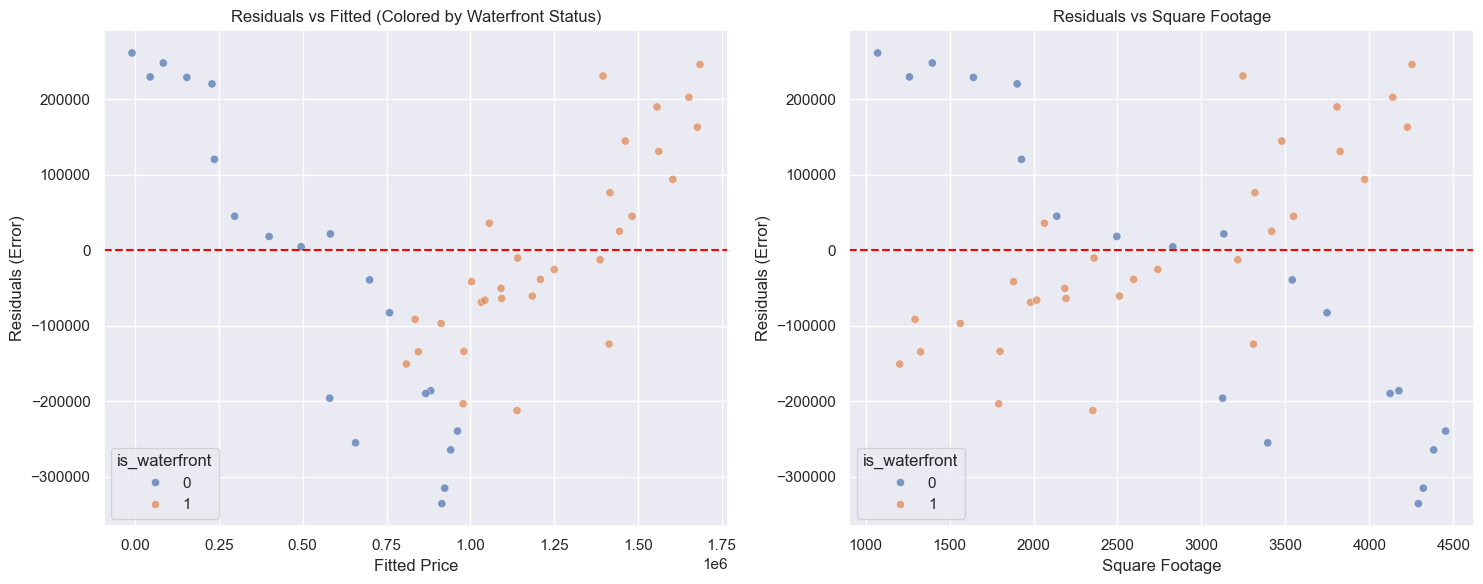

In [3]:
# --- Baseline Model Fit ---
X = df_houses[['sq_ft', 'is_waterfront']]
y = df_houses['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_base = LinearRegression().fit(X_train, y_train)
y_pred_base = lr_base.predict(X_test)

r2_base = r2_score(y_test, y_pred_base)

# === FIX APPLIED HERE ===
# Calculate MSE, then take the square root for RMSE
mse_base = mean_squared_error(y_test, y_pred_base)
rmse_base = np.sqrt(mse_base)
# ========================

print(f'Baseline Model --> R²={r2_base:.4f} | RMSE=${rmse_base:,.2f}')

# --- Diagnostic Plots for Baseline Model ---
resid_base = y_test - y_pred_base
fitted_base = y_pred_base

print("\n--- Baseline Model Diagnostics ---")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Residuals vs Fitted
# We color the points by 'is_waterfront' to see if there's a pattern
sns.scatterplot(x=fitted_base, y=resid_base, hue=X_test['is_waterfront'], ax=axes[0], alpha=0.7)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuals vs Fitted (Colored by Waterfront Status)')
axes[0].set_xlabel('Fitted Price')
axes[0].set_ylabel('Residuals (Error)')

# Plot 2: Residuals vs. a Predictor (sq_ft)
# This can be even more revealing for interaction effects
sns.scatterplot(x=X_test['sq_ft'], y=resid_base, hue=X_test['is_waterfront'], ax=axes[1], alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuals vs Square Footage')
axes[1].set_xlabel('Square Footage')
axes[1].set_ylabel('Residuals (Error)')

plt.tight_layout()
plt.show()

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

Improved Model --> R²=0.9763 | RMSE=$73,424.56

--- Improved Model Diagnostics ---


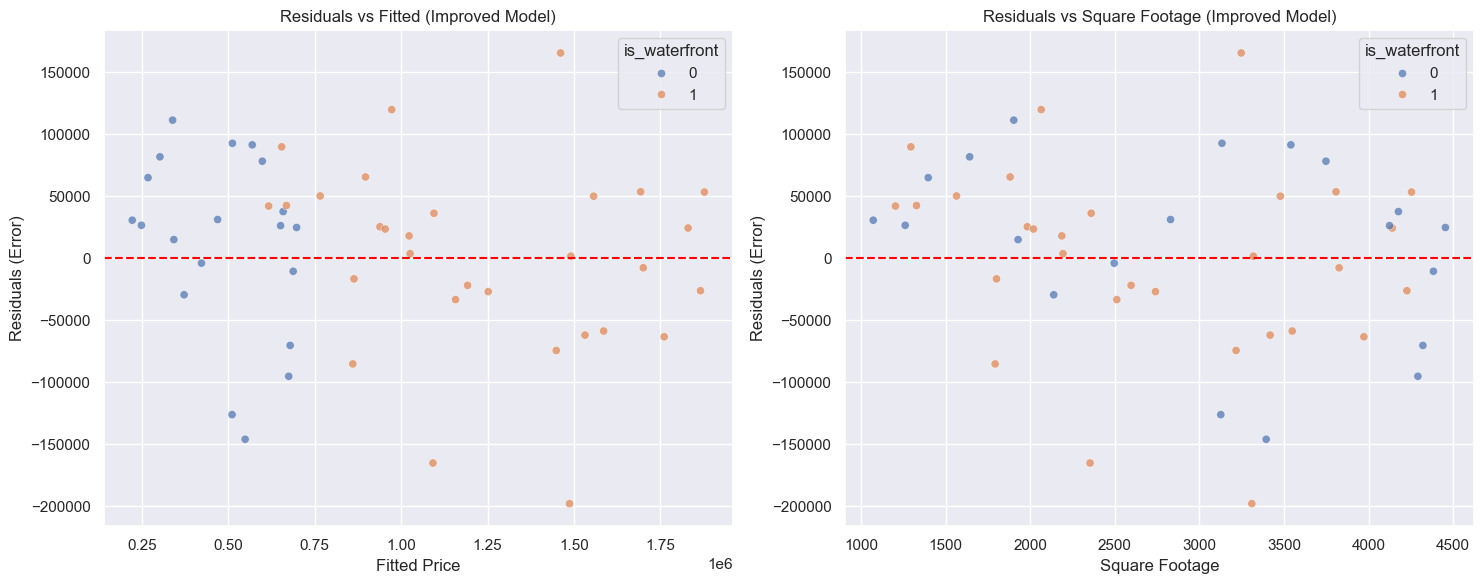

In [4]:
# --- Engineer the Interaction Feature ---
df_houses['sqft_x_waterfront'] = df_houses['sq_ft'] * df_houses['is_waterfront']

# --- Improved Model Fit ---
X_improved = df_houses[['sq_ft', 'is_waterfront', 'sqft_x_waterfront']]
y_improved = df_houses['price']

# Use the same train/test split
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_improved, y_improved, test_size=0.2, random_state=42)

lr_improved = LinearRegression().fit(X_train_imp, y_train_imp)
y_pred_improved = lr_improved.predict(X_test_imp)

r2_improved = r2_score(y_test_imp, y_pred_improved)
mse_improved = mean_squared_error(y_test_imp, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)

print(f'Improved Model --> R²={r2_improved:.4f} | RMSE=${rmse_improved:,.2f}')

# --- Diagnostic Plots for Improved Model ---
resid_improved = y_test_imp - y_pred_improved
fitted_improved = y_pred_improved

print("\n--- Improved Model Diagnostics ---")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Residuals vs Fitted
sns.scatterplot(x=fitted_improved, y=resid_improved, hue=X_test_imp['is_waterfront'], ax=axes[0], alpha=0.7)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuals vs Fitted (Improved Model)')
axes[0].set_xlabel('Fitted Price')
axes[0].set_ylabel('Residuals (Error)')

# Plot 2: Residuals vs. Square Footage
sns.scatterplot(x=X_test_imp['sq_ft'], y=resid_improved, hue=X_test_imp['is_waterfront'], ax=axes[1], alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuals vs Square Footage (Improved Model)')
axes[1].set_xlabel('Square Footage')
axes[1].set_ylabel('Residuals (Error)')

plt.tight_layout()
plt.show()

## 4) Interpretation (write your conclusions below)
Looking at these plots tells a really clear story about our two models. The first model had a major blind spot, and the second one fixed it beautifully.

-   **Linearity: The Tale of Two Slopes**
    -   In our **Baseline Model**, the diagnostic plots are practically screaming at us that something is wrong. On the right-hand plot ("Residuals vs Square Footage"), you can see the problem in plain sight. For the non-waterfront homes (blue dots), the errors are scattered randomly around the zero line—that's good! But for the waterfront homes (orange dots), there’s a steep, downward-sloping line.
    -   In simple terms, this means our first model was clueless. It systematically **underestimated** the price of smaller waterfront homes and **overestimated** the price of large waterfront homes. It didn't understand that an extra square foot on the waterfront is worth a lot more than one inland. This is a huge violation of the linearity assumption; the relationship wasn't a simple straight line for everyone.
    -   The **Improved Model** is a night-and-day difference. After we added the interaction term (`sq_ft * is_waterfront`), the downward slope for the orange dots completely vanished. Now, both the blue and orange dots form a healthy, random cloud around the zero line. This tells us our new model *understands* the nuance: the value of square footage depends on whether you have a view of the water. The systematic error is gone, and the linearity assumption is now satisfied.

-   **Which model do you trust and why?:**
    -   Without a doubt, I trust the **Improved Model**. The baseline model isn't just a little off; it's **predictably wrong** for an entire group of expensive properties. You could lose a lot of money trusting its estimates for waterfront homes.
    -   The improved model, on the other hand, makes "honest" mistakes. Its errors, as seen in the second set of plots, are just random noise—the kind of unavoidable uncertainty we expect in the real world. This is backed up by the numbers, too: the R² jumped significantly, and the RMSE (our average prediction error) dropped, confirming that this model is much more accurate and reliable.

-   **Why is adding an interaction term still "Linear Regression"?**
    -   This is a great question. It feels like we're modeling a curve, but it's still considered a linear model. The "linear" part refers to the fact that the model is a simple sum of its parts. Think of it like this: we created a new, custom feature called `sqft_x_waterfront`. Our model is simply `Price = C₁*sq_ft + C₂*is_waterfront + C₃*(our_new_feature)`. We are still just finding the best coefficients (the `C`s) to multiply by our features and add them up. The equation is linear *in its coefficients*, even if the features themselves are complex.

-   **Next step you’d try:**
    -   The big problem is fixed, but a good data scientist is never done. The next thing I'd investigate is a potential "diminishing returns" effect. For example, does the value of an extra square foot start to level off once a house gets to be enormous (say, over 4,000 sq ft)? I could test this by adding a `sq_ft**2` term to the model to see if it captures any of that curvature.